#  Example 1 - Amplification of microsecond pulses

In this example, we set up and run a simple time-dynamic simulation, in which we amplify microsecond pulses in a core-pumped Yb-doped fiber. This example resembles a quasi-CW laser but is probably not relevant to any real application. Most importantly, using long and weak pulses allows getting nice-looking plots without scaling. All units are in SI.

### 0) Required imports

In [1]:
import numpy as np
from scipy.signal import square  # For square pulse train generation

%matplotlib inline
import matplotlib.pyplot as plt

from pyfiberamp.dynamic import DynamicSimulation
from pyfiberamp.fibers import YbDopedFiber
from pyfiberamp.helper_funcs import dynamic_time_coordinates

In [2]:
plt.rcParams["figure.figsize"] = (12,10)

### 1) Creating the fiber (1 m long, 6 um, core-pumped)

In [3]:
length = 1
core_radius = 3e-6
core_na = 0.12
yb_number_density = 1e25
background_loss = 0

yb_fiber = YbDopedFiber(length=length,
                        core_radius=core_radius,
                        core_na=core_na,
                        ion_number_density=yb_number_density,
                        background_loss=background_loss)

### 2) Setting the other simulation parameters

In [4]:
spatial_nodes = 50
time_steps = 5000000
pump_wavelength = 976e-9
signal_wavelength = 1030e-9
pump_power = 0.2

### 3) Generation of the input signal waveform (10 kHz, 20 us pulses with 100 mW peak power)
Note: Nanosecond pulses and higher repetition rates would work equally well, but the plotting would need more work.

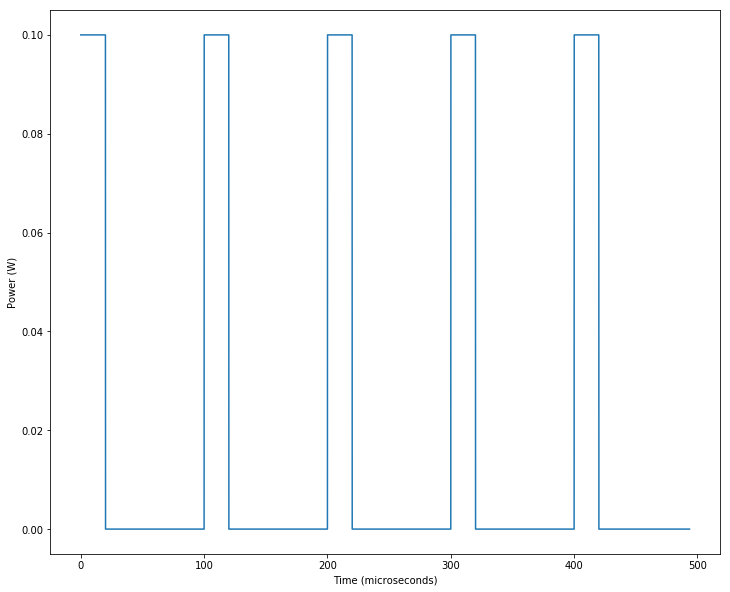

In [5]:
rep_rate = 1e4
duration = 20e-6
peak_power = 0.1
t = dynamic_time_coordinates(time_steps, spatial_nodes, yb_fiber.length)
signal_in = peak_power * (square(2 * np.pi * t * rep_rate, duty=duration*rep_rate) + 1) / 2
plt.plot(t*1e6, signal_in)
plt.xlabel('Time (microseconds)')
plt.ylabel('Power (W)')
plt.show()

### 4) Setting up and executing the simulation
This might take some time depending on the computer's CPU.

In [6]:
simulation = DynamicSimulation(max_time_steps=time_steps)
simulation.fiber = yb_fiber
simulation.add_backward_pump(wl=pump_wavelength, input_power=pump_power)
simulation.add_forward_signal(wl=signal_wavelength, input_power=signal_in)
res = simulation.run(spatial_nodes)

### 5) Plotting and interpretation of the results

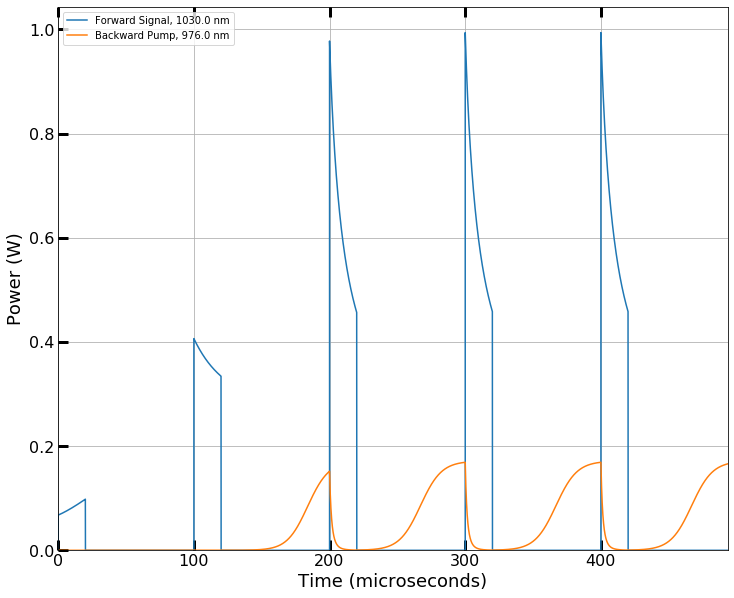

In [7]:
res.plot_outputs()

This figure shows the output powers of the signal and pump beams. They are both switched on at the same time. 


When the first pulse propagates through the fiber at the start, the fiber is not yet inverted and, in fact, absorbs at the signal wavelength. The absorption is strongest at the leading edge of the pulse but saturates within the pulse duration and the fiber becomes transparent to the signal by the time the trailing edge propagates through the amplifier. No unabsorbed pump comes through the fiber at this point.


The second pulse is already amplified to about 3.5 times the original pulse energy and also preserves its shape surprisingly well. The gain is roughly constant during the pulse.

From the third pulse onwards, the amplifier seems to settle into a steady operation. The output pulse shape is distorted because the leading edge collects a large part of the stored energy and starts to saturate the gain. The gain recovers during the pulse-off time. Right before the pulse emission, most of the pump power is also transmitted through the amplifier strongly hinting that this simple experiment has room for optimization. The part of the pump power that is not transmitted is required to maintain inversion against losses to spontaneous emission. 

You may wonder if amplified spontaneous emission (ASE) might deplete the inversion between the pulses. I don't expect it to because of the low doping concentration and the short fiber. However, the main reason for not including ASE in the simulation is that I wanted to keep this example as simple as possible. ASE channels could easily be added with just one line of code.

If you have want to ask a question of send feedback about this example, please open a new issue on GitHub or contact me at <pyfiberamp@gmail.com>.